## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [12]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import io
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [13]:
data=files.upload()

Saving Airbnb NYC 2019.csv to Airbnb NYC 2019 (4).csv


In [15]:
df = pd.read_csv(io.BytesIO(data['Airbnb NYC 2019.csv']))

In [23]:
#size and type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [24]:
#Removing the Duplicates if any
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [25]:
#check null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [26]:
#remove the NaN values from dataset
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

In [27]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [28]:
df.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [29]:
new=df.groupby(['host_id','neighbourhood_group'],as_index=True).size()
new=new.sort_values(ascending=False)
new.head(20)

host_id    neighbourhood_group
219517861  Manhattan              327
107434423  Manhattan              230
30283594   Manhattan              121
16098958   Manhattan               96
12243051   Manhattan               96
61391963   Manhattan               91
22541573   Manhattan               86
137358866  Queens                  79
200380610  Manhattan               65
7503643    Brooklyn                52
1475015    Manhattan               52
120762452  Manhattan               50
2856748    Manhattan               49
205031545  Manhattan               49
190921808  Manhattan               47
2119276    Manhattan               39
26377263   Brooklyn                35
119669058  Brooklyn                34
25237492   Manhattan               34
113805886  Manhattan               33
dtype: int64

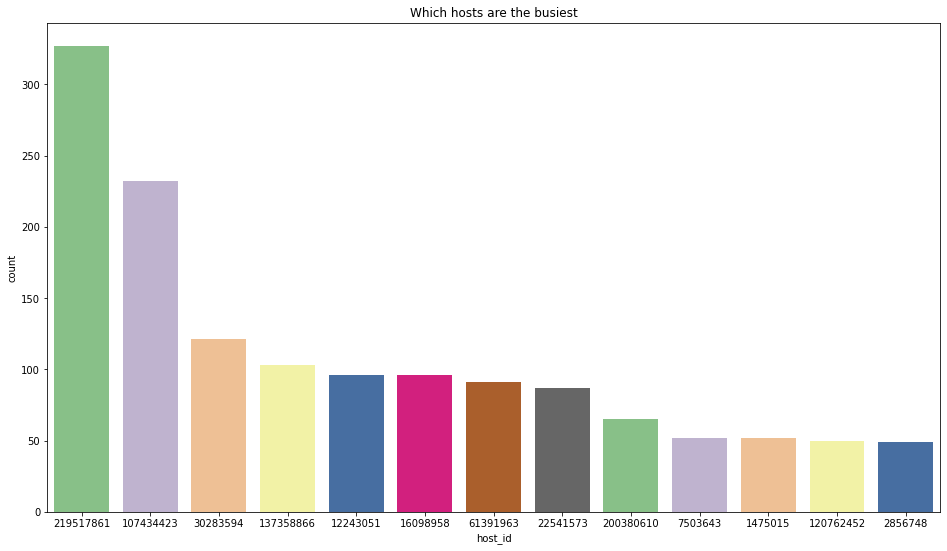

In [30]:
plt.figure(1, figsize=(16, 9))
plt.title("Which hosts are the busiest")
sns.countplot(x = "host_id", order=df['host_id'].value_counts().index[0:13] ,data=df,palette='Accent')

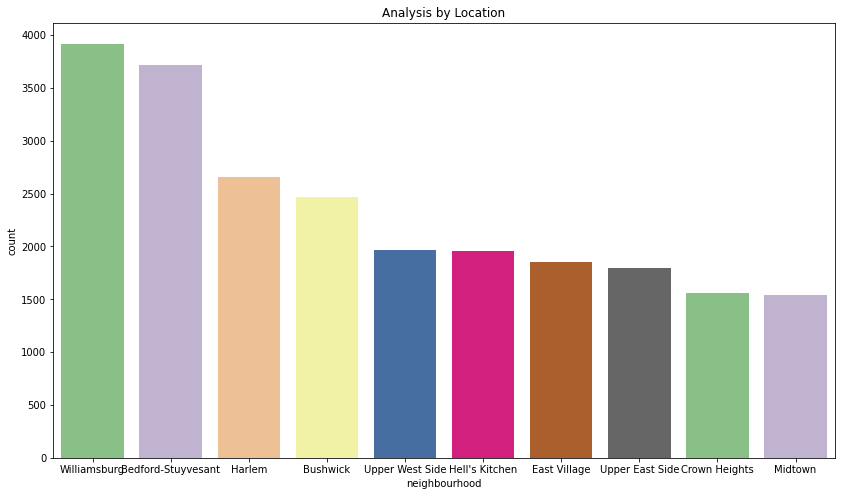

In [31]:
plt.figure(1,figsize=(14,8))
plt.title('Analysis by Location')
#sns.barplot(x = "neighbourhood_group", order=df['neighbourhood_group'].value_counts().index[0:10] ,data=df])
sns.countplot(x = "neighbourhood", order=df['neighbourhood'].value_counts().index[0:10] ,data=df,palette='Accent')

from the above data and graph it is evident that only one host is always going to Manhattan highest number of times may be due to so many other reasons like near to their hometown and safer place.
## it is also shows that Manhattan is having highest bookings.

Which hosts are the busiest and why?
host_id:219517861  name:Sonder(NYC) looks huge difference in bookings

In [32]:
new

host_id    neighbourhood_group
219517861  Manhattan              327
107434423  Manhattan              230
30283594   Manhattan              121
16098958   Manhattan               96
12243051   Manhattan               96
                                 ... 
48851196   Brooklyn                 1
48852712   Manhattan                1
48857380   Manhattan                1
48858084   Manhattan                1
2438       Brooklyn                 1
Length: 37572, dtype: int64

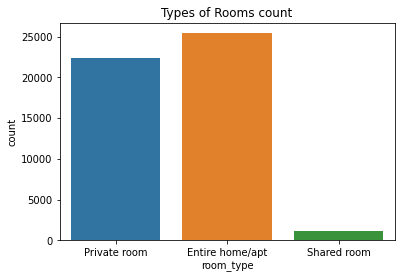

In [ ]:
plt.title('Types of Rooms count')
sns.countplot(df['room_type'])

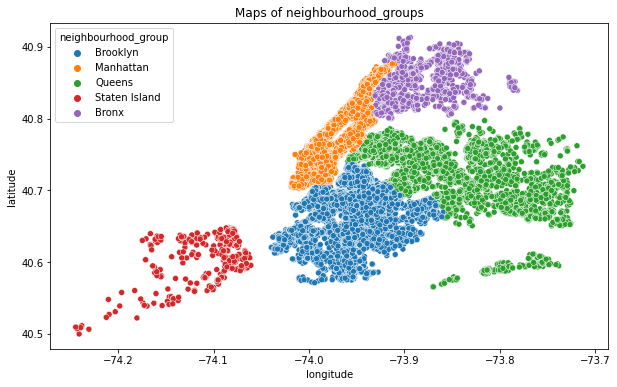

In [ ]:
#locations
plt.figure(figsize=(10,6))
plt.title('Maps of neighbourhood_groups')
sns.scatterplot(df.longitude, df.latitude, hue=df.neighbourhood_group)

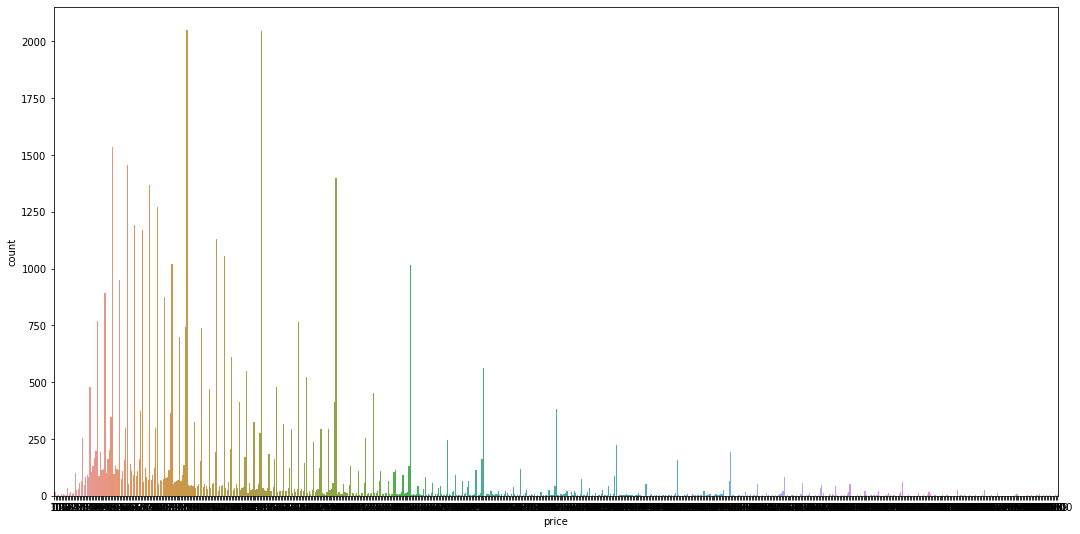

In [ ]:
plt.figure(figsize=(18,9))
sns.countplot(df['price'])


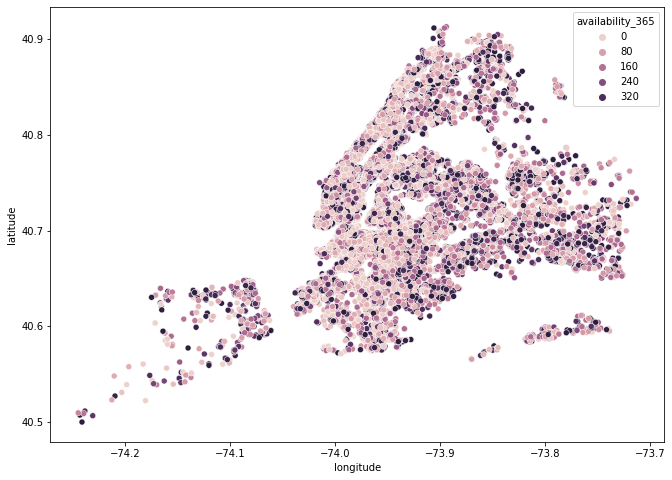

In [ ]:
plt.figure(figsize=(11,8))
sns.scatterplot(df.longitude,df.latitude, hue=df.availability_365)

### **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)

In [ ]:
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2,1,108,2025,4568,1,138,0,9,21,5,365
1,3,2,127,11521,3450,0,214,0,45,38,1,355
2,13,2,94,16012,7576,1,139,2,0,0,0,365
3,14,1,41,4964,5791,0,78,0,270,464,0,194
4,18,2,61,15154,7367,0,69,9,9,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,10255,1,13,4320,6772,1,59,1,0,0,1,9
48891,8945,1,28,6571,8420,1,29,3,0,0,1,36
48892,17488,2,94,16395,6900,0,104,9,0,0,0,27
48893,19748,2,95,11891,2716,2,44,0,0,0,5,2


### **Regression Analysis**

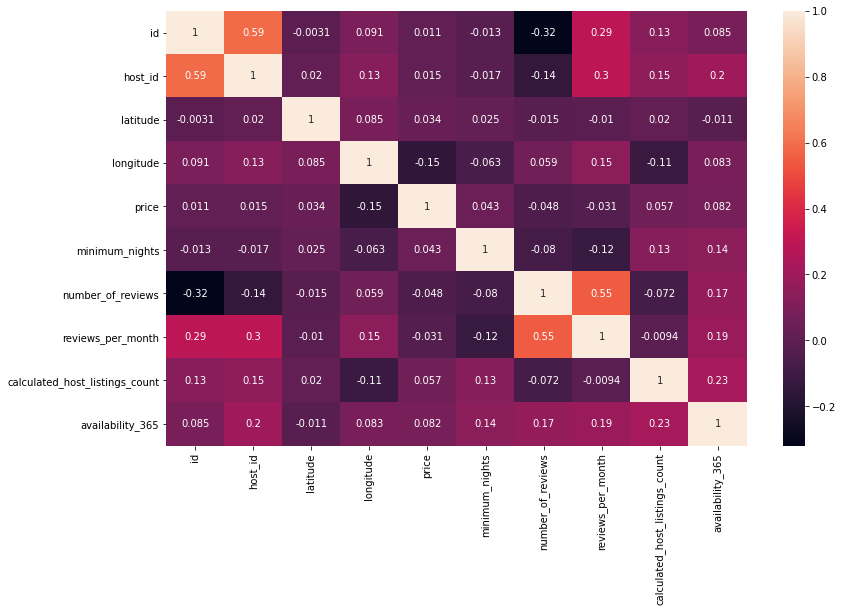

In [ ]:
#Get Correlation between different variables

plt.figure(figsize=(13,8))
corr=df.corr(method='pearson')
sns.heatmap(corr, annot=True)


In [ ]:
#Prepare a Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = df.iloc[:,[1,5,7,10,11]]
y = df['price']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=101)

In [ ]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2642780258537767

**Prepairng a Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(min_samples_leaf=.0001)
DT.fit(x_train,y_train)
y_predict=DT.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)



0.31831985659344375